# time series and datetime
- [the datetime library](#the-datetime-library)
- [datetime objects](#datetime-object)
- [`timedelta()`](#timedelta)
- [load the UFO data](#load-the-ufo-reports-data)
- [pandas' `pd.datetime`](#pandas-pddatetime)
- [timestamps](#timestamps)
- [visualization](#visualization)


<a id="the-datetime-library"></a>
## the datetime library
---

Python's `datetime` library is great for dealing with time-related data, and Pandas has incorporated this library into its own datetime series and objects.

- Datetime objects.
- Datetime series.
- Timestamps.
- `timedelta()`.


<a id="datetime-object"></a>
## datetime objects
---
We can use to create a datetime object by entering in the different components of the date as arguments.

In [2]:
from datetime import datetime

In [4]:
# requires at least 3 arguments, year, month, day

lesson_date = datetime(2021, 4, 1, 6)

The components of the date are accessible via the object's attributes.

In [6]:
lesson_date.day

1

### `strftime()` and `strptime()`

A `datetime` object has two string methods that can be of use: `strftime()` and `strptime()`.

`strftime()` (think string _from_ time) formats a datetime object into a string following a particular format.

In [59]:
fmt = '%A %d of %B %Y'
fancydate =datetime.strftime(lesson_date, format =fmt)
fancydate

'Thursday 01 of April 2021'

`strptime()` (think string _parsed to_ time) parses a string into a datetime object following a particular format.

In [9]:
datetime.strptime(fancydate, fmt)

datetime.datetime(2021, 4, 1, 0, 0)

Formatting syntax follows the C implementation, and requires some playing to get right. Here is the [full list of formatting options](https://docs.python.org/3.6/library/datetime.html?highlight=strftime#strftime-and-strptime-behavior).

## timezones

A timezone's offset refers to how many hours the timezone is from Coordinated Universal Time (UTC).

A naive datetime object contains no timezone information.

In [11]:
print(lesson_date.tzinfo)

None


To make a datetime object offset aware, you can use the pytz library. First, you have to instantiate a timezone object, and then use that timezone object to "localize" a datetime object. Localizing simply gives the object timezone information.

In [12]:
import pytz

pytz.timezone('US/Pacific')

<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>

In [14]:
my_timezone =pytz.timezone('America/los_angeles')

In [16]:
lesson_date_aware =my_timezone.localize(lesson_date)

In [17]:
print(lesson_date_aware)

2021-04-01 06:00:00-07:00


A naive datetime object is limited, it cannot locate itself relative to offset aware datetime objects.

In [18]:
tomorrow = datetime(2021, 4, 2)
tomorrow > lesson_date_aware

TypeError: can't compare offset-naive and offset-aware datetimes

Datetime's `.now()` function will give you the datetime object of this very moment.

In [19]:
datetime.now()

datetime.datetime(2021, 4, 1, 6, 34, 16, 88548)

In [20]:
datetime.utcnow()

datetime.datetime(2021, 4, 1, 13, 34, 39, 389592)

In [21]:
utc_now =pytz.utc.localize(datetime.utcnow())

In [22]:
my_now =utc_now.astimezone(my_timezone)

In [23]:
utc_now == my_now

True

ISO is standard format time. UTC is the primary time standard by which the world regulates clocks and time

In [24]:
utc_now.isoformat()

'2021-04-01T13:35:37.593401+00:00'

<a id="timedelta"></a>
## `timedelta()`
---
Suppose we want to add time to a date or subtract time from it, we can use a `timedelta` object to shift a datetime object.

The timedelta() has attributes that allow us to extract values from it.
Per the documentation, only days, seconds, microseconds are stored. 
Mls, mins, hours, weeks are converted to:

* A millisecond is converted to 1000 microseconds.
* A minute is converted to 60 seconds.
* An hour is converted to 3600 seconds.
* A week is converted to 7 days.

In [25]:
from datetime import timedelta
offset = timedelta(days =2, hours =11, weeks=3)

In [29]:
offset.days

23

In [31]:
datetime.now() + offset

datetime.datetime(2021, 4, 24, 17, 41, 27, 290702)

The current time is particularly useful when using `timedelta()`.
> _Note: The largest value a `timedelta()` can hold is `days`. For instance, you can't say you want your offset to be two years, 44 days, and 12 hours; you have to convert those years to days._

You can read more in the `timedelta()` category [here](https://docs.python.org/3.6/library/datetime.html).

Suppose I want to compute a duration, like I want to know two 'people's' age difference.

In [61]:
# how old is gaby?  Happy birthday!!!
gabys_birthday =datetime(2005, 4, 1)
meryls_dog =datetime(2019, 12, 25)

In [62]:
gabys_birthday_aware =my_timezone.localize(gabys_birthday)
meryls_dog_aware =my_timezone.localize(meryls_dog)

In [67]:
gabys_birthday_aware- meryls_dog_aware

datetime.timedelta(days=-5381)

In [78]:
diff =gabys_birthday_aware- meryls_dog_aware
diff.days/365

-14.742465753424657

In [79]:
# calculate a 'person's' age:
def age():
    pass

<a id="load-the-ufo-reports-data"></a>
## load the UFO reports data
---
We can practice using datetime functions and objects with the UFO reports data.

In [35]:
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [36]:
ufo['Time'].dtype

dtype('O')

<a id="pandas-pddatetime"></a>
## pandas and datetime
---
we can convert columns of data from string objects into date objects with the `pd.to_datetime()` function, we've seen this already.

In [44]:
# if you know the format, this will save comp. time

ufo['Time'] =pd.to_datetime(ufo.Time, format='%m/%d/%Y %H:%M')#, errors ='coerce')

In [46]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


Pandas' datetime columns have a `.dt` attribute that allows you to access attributes specific to dates. For example:

```python
ufo.Time.dt.day
ufo.Time.dt.month
ufo.Time.dt.year
ufo.Time.dt.weekday_name
```

[And there are many more!](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [45]:
ufo.Time.dt.weekday_name

0         Sunday
1         Monday
2         Sunday
3         Monday
4        Tuesday
          ...   
18236     Sunday
18237     Sunday
18238     Sunday
18239     Sunday
18240     Sunday
Name: Time, Length: 18241, dtype: object

### inferring `datetime`

We can also tell pandas to parse (or try to parse) datetime objects when we're reading in a `.csv`.

In [ ]:
# pd.read_csv('http://bit.ly/uforeports', parse_dates=[4], infer_datetime_format=True)

`Parse_dates` takes three types of values: boolean, lists, and dictionaries.
* Boolean (default=False) True will attempt to parse the index as a datetime
* List [1,2,3] will attempt to parse the several columns into datetime objects
* Nested List [[1,2,3]] will attempt to combine the several columns into one datetime column

<a id="timestamps"></a>
## timestamps
---
Timestamps are useful objects for comparisons. You can create a timestamp object with the `pd.to_datetime()` function and a string specifying the date.

In [47]:
ts =pd.to_datetime('1999/01/01')
ts

Timestamp('1999-01-01 00:00:00')

In [48]:
ufo.Time >= ts

0        False
1        False
2        False
3        False
4        False
         ...  
18236     True
18237     True
18238     True
18239     True
18240     True
Name: Time, Length: 18241, dtype: bool

In [49]:
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


<a id="visualization"></a>
## visualization
---
Pandas' `.dt` [here](http://pandas.pydata.org/pandas-docs/stable/api.html). Allows us to get properties from a series

In [50]:
ufo['Year'] =ufo.Time.dt.year

In [51]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


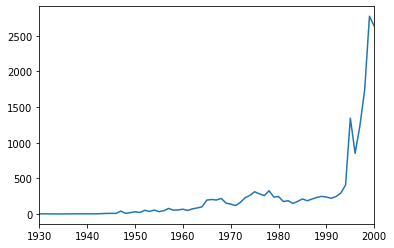

In [54]:
ufo.Year.value_counts().sort_index().plot(x ='Year')

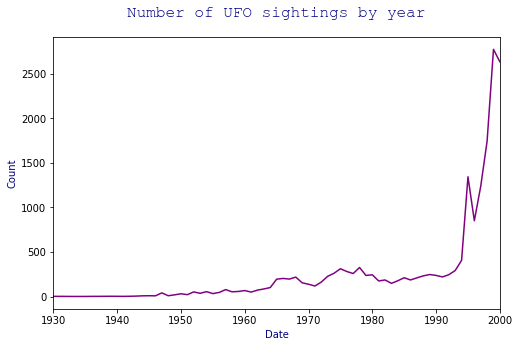

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
ufo['Year'].value_counts().sort_index().plot(color='purple')
plt.title('Number of UFO sightings by year', fontsize=16, color='navy', 
          pad=20, fontname='courier new')
plt.xlabel('Date', color='navy')
plt.ylabel('Count', color='navy');

In [81]:
ufo['Weekday_name'] =ufo.Time.dt.weekday_name
ufo['Weekday'] =ufo.Time.dt.weekday

In [82]:
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time,Year,Weekday_name,Weekday
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,Sunday,6
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,Monday,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,Sunday,6


I am wondering about the shapes, those look interesting...

In [83]:
ufo['Shape Reported'].value_counts()

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
PYRAMID         1
FLARE           1
HEXAGON         1
DOME            1
Name: Shape Reported, dtype: int64

In [85]:
# to compare 2 shapes by weekday

ufo_shapes =ufo[(ufo['Shape Reported'] == 'DISK') | (ufo['Shape Reported'] == 'LIGHT')]

In [88]:
ufo_shapes['Shape Reported'].value_counts()

LIGHT    2803
DISK     2122
Name: Shape Reported, dtype: int64

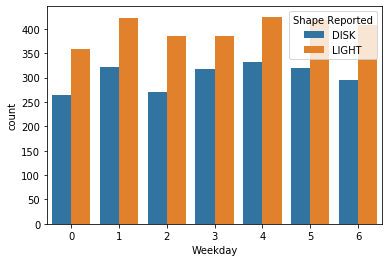

In [90]:
import seaborn as sns

sns.countplot(x='Weekday', hue='Shape Reported', data=ufo_shapes);

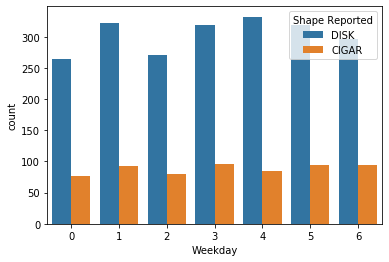

In [91]:
# I want to make a function so I can compare whatever 2 shapes I want

def plot_shapes(shape1 ='DISK', shape2 ='CIGAR'):
    shape_df =ufo[(ufo['Shape Reported'] == shape1) | (ufo['Shape Reported'] == shape2)]
    sns.countplot(x='Weekday', hue='Shape Reported', data=shape_df)
    return plt.show()

plot_shapes()

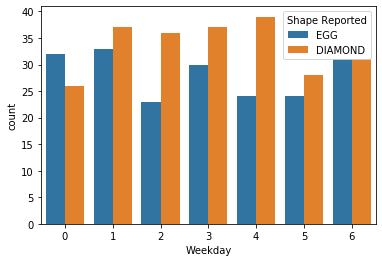

In [92]:
plot_shapes('DIAMOND', 'EGG')